In [1]:
cd ..

/home/danil-pass123/Desctop/semester7/PMLDL/Project


In [2]:
import os
from yolov5 import train, val, detect
from yolov5.utils import metrics

from IPython.display import clear_output
import torch

from PIL import Image

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from cv2 import cv2
from torchvision import transforms

In [4]:
cd animalsCounting

/home/danil-pass123/Desctop/semester7/PMLDL/Project/animalsCounting


# Search animals on images

In [5]:
IMAGES_LOCATION = "/media/danil-pass123/E/DataSet/train1/train"
DATA = "/media/danil-pass123/E/DataSet"

weights = DATA + '/exp/exp/weights/best.pt'
runs_location = DATA + "/runs_test"

## Predict animals location

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights)
model.eval()
clear_output()

In [8]:
def predict_bboxes(img):
    """
    predicting bboxes for all images using yolo model
    :param img: list[Image.Image]
    :return: list[pd.DatafFrame]
    """
    def make_bbox(df):
        """
        filter bbox by confidence
        :param df: pd.DataFrame
        :return: dataframe with bbox
        """
        filtered_df = df[df['confidence'] > 0.3]
        bbox = filtered_df[['xmin', 'ymin', 'xmax', 'ymax']]
        return bbox

    data = model(img)
    bboxes = [make_bbox(im) for im in data.pandas().xyxy]
    return bboxes

def predict(files):
    """
    Prediction of number of animals in sequence of images.
    :param files: list[str], str is path to file
    :return: int
    """
    images = [Image.open(file) for file in files]
    return predict_bboxes(images)

In [9]:
train_ds = pd.read_csv(DATA+'/processed_train.csv', sep='\t', index_col=0)

In [10]:
images_list = [IMAGES_LOCATION +'/'+i for i in train_ds[train_ds['seq_id'] == '89b0a358-21bc-11ea-a13a-137349068a90']['file_name'].values]
images_list

['/media/danil-pass123/E/DataSet/train1/train/87a6968a-21bc-11ea-a13a-137349068a90.jpg',
 '/media/danil-pass123/E/DataSet/train1/train/89b0a182-21bc-11ea-a13a-137349068a90.jpg',
 '/media/danil-pass123/E/DataSet/train1/train/871f798e-21bc-11ea-a13a-137349068a90.jpg']

In [37]:
labels = predict(images_list)

In [38]:
labels[1].values

array([[     932.24,      203.03,      1507.6,      699.61]])

In [41]:
x_min,y_min,x_max,y_max = labels[1].values[0].astype(int)

In [63]:
convert_tensor = transforms.ToTensor()
img = Image.open(images_list[1])
img = convert_tensor(Image.open(images_list[1]))

In [65]:
img.shape

torch.Size([3, 1536, 2048])

In [61]:
"""
plt.imshow(img[0,x_min:x_max,y_min:y_max])
plt.show()
plt.imshow(img[1,x_min:x_max,y_min:y_max])
plt.show()
plt.imshow(img[2,x_min:x_max,y_min:y_max])
plt.show()
"""
(img[:,x_min:x_max,y_min:y_max]-img[:,x_min:x_max,y_min:y_max]).sum()

tensor(0.)

In [53]:
test_images = []
test_img_names = []
test_labels = []
sequences = []

In [55]:
counter = 0
for s in train_ds['seq_id'].unique():
    new_images_name = list(train_ds[train_ds['seq_id']==s]['id'].values)
    new_images_path = [IMAGES_LOCATION + "/" + p for p in train_ds[train_ds['seq_id']==s]['file_name'].values]
    
    try:
        res = predict_bboxes([Image.open(file) for file in new_images_path])
    except:
        continue
    
    
    test_images = test_images + new_images_path
    test_img_names = test_img_names + new_images_name
    test_labels = test_labels + res
    sequences = sequences + [s for _ in range(len(new_images_name))]
    
    counter += 1
    
    if counter>5:
        break

1 1
1 2
2 4
3 7
3 10
3 13


In [56]:
len(sequences),len(test_img_names),len(test_images),len(test_labels)

(13, 13, 13, 13)

In [58]:
d = {"seq":sequences,"img_name":test_img_names,"path":test_images,"bbox":test_labels}
d = pd.DataFrame(d)
d.to_csv("Seq_predictions.scv")

In [59]:
d

,seq,img_name,path,bbox
0,8f3efeaa-21bc-11ea-a13a-137349068a90,877a0796-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
1,8b9ce12c-21bc-11ea-a13a-137349068a90,895686ca-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
2,9957a0ae-21bc-11ea-a13a-137349068a90,86de7b3c-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/86...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
3,9957a0ae-21bc-11ea-a13a-137349068a90,8a26ff62-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/8a...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
4,89598cee-21bc-11ea-a13a-137349068a90,87d66e32-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
5,89598cee-21bc-11ea-a13a-137349068a90,886ab22c-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/88...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
6,89598cee-21bc-11ea-a13a-137349068a90,89598b7c-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
7,89b0a358-21bc-11ea-a13a-137349068a90,87a6968a-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
8,89b0a358-21bc-11ea-a13a-137349068a90,89b0a182-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,xmin ymin xmax ...
9,89b0a358-21bc-11ea-a13a-137349068a90,871f798e-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."


In [76]:
d[d['seq']=="89b0a358-21bc-11ea-a13a-137349068a90"]

,seq,img_name,path,bbox
7,89b0a358-21bc-11ea-a13a-137349068a90,87a6968a-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."
8,89b0a358-21bc-11ea-a13a-137349068a90,89b0a182-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,xmin ymin xmax ...
9,89b0a358-21bc-11ea-a13a-137349068a90,871f798e-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame Columns: [xmin, ymin, xmax, ym..."


In [78]:
d[d['seq']=="89b0a358-21bc-11ea-a13a-137349068a90"]['path'].values

array(['/media/danil-pass123/E/DataSet/train1/train/87a6968a-21bc-11ea-a13a-137349068a90.jpg', '/media/danil-pass123/E/DataSet/train1/train/89b0a182-21bc-11ea-a13a-137349068a90.jpg', '/media/danil-pass123/E/DataSet/train1/train/871f798e-21bc-11ea-a13a-137349068a90.jpg'], dtype=object)

In [124]:
for p in d[d['seq']=="8f3efeaa-21bc-11ea-a13a-137349068a90"]['path'].values:
    plt.imshow(cv2.imread(p))
    plt.show()

NameError: name 'd' is not defined

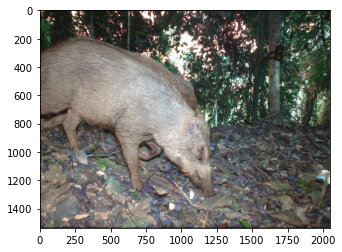

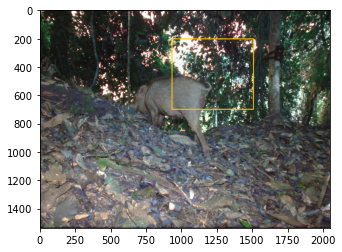

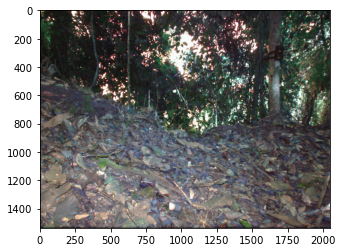

In [150]:
"""
for p in d[d['seq']=="89b0a358-21bc-11ea-a13a-137349068a90"]['img_name'].values:
    
    idx = dataSample[dataSample['img']==p].index[0]
    
    p = f'/media/danil-pass123/E/DataSet/runs_test/iter{idx}/{p}.jpg'
    img = plt.imread(p, cv2.IMREAD_COLOR)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
for i in range(10):
    print(os.listdir(f'/media/danil-pass123/E/DataSet/runs_test/iter1266{i}/'))
"""

'\nfor p in d[d[\'seq\']=="89b0a358-21bc-11ea-a13a-137349068a90"][\'img_name\'].values:\n    \n    idx = dataSample[dataSample[\'img\']==p].index[0]\n    \n    p = f\'/media/danil-pass123/E/DataSet/runs_test/iter{idx}/{p}.jpg\'\n    img = plt.imread(p, cv2.IMREAD_COLOR)\n    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    plt.imshow(img)\n    plt.show()\n'

## Predict animals location

In [41]:
#Remove images if needed
#if len(os.listdir(runs_location))>0:
#    os.system(f"rm -r {runs_location}/*")

In [42]:
test_images = []
test_img_names = []
test_labels = []

#load weights



#source = '/media/danil-pass123/Новый том/DataSet/dataset/images/test/'

n_images = len(os.listdir(IMAGES_LOCATION))

#for i,img_path,img in zip(range(data_descriptor_test.sample_size),data_descriptor_test.image_dir,data_descriptor_test.image_name):
for i,img_path in enumerate(os.listdir(IMAGES_LOCATION)):
    img = img_path.split("/")[-1].split('.')[0]
    img_path = IMAGES_LOCATION +'/'+ img_path
    clear_output(wait=True)
    print(f"{i}/{n_images}")

    detect.run(weights = weights,source = img_path, 
               project = runs_location,name = f"iter{i}",save_txt=True,conf_thres=0.25
              )
    
    test_images.append(f'{runs_location}/iter{i}/images/{img}.jpg')
    test_labels.append(f'{runs_location}/iter{i}/labels/{img}.txt')
    test_img_names.append(img)

YOLOv5 🚀 v6.2-231-g0039870 Python-3.8.8 torch-1.12.1 CPU

Fusing layers... 


43457/43458


Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /media/danil-pass123/E/DataSet/train1/train/8a875ccc-21bc-11ea-a13a-137349068a90.jpg: 480x640 1 animal, 153.2ms
Speed: 0.6ms pre-process, 153.2ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to /media/danil-pass123/E/DataSet/runs_test/iter43457
1 labels saved to /media/danil-pass123/E/DataSet/runs_test/iter43457/labels


In [89]:
len(test_images),len(test_img_names),len(test_labels)

(43458, 43458, 43458)

## Load animals location from directory

In [10]:
test_images = []
test_img_names = []
test_labels = []

for i,iiter in enumerate(os.listdir(runs_location)):
    
    img_p = os.listdir(runs_location +"/"+ iiter)[0]
    img_p = runs_location +"/"+ iiter + "/" + img_p
    
    img_n = os.listdir(runs_location +"/"+ iiter)[0].split('.')[0]
    
    l_list = os.listdir(runs_location +"/"+ iiter+'/'+'labels')
    l = "-"
    if len(l_list)>0:
        l = l_list[0]
    l = runs_location +"/"+ iiter + "/"+"labels/" + l
    
    test_images.append(img_p)
    test_img_names.append(img_n)
    test_labels.append(l)
    
    

In [90]:
#Save if needed
data = {"img":test_img_names,"labels":y_pred}
pd.DataFrame(data).to_csv("samplesCounts.csv")

### Preprocess labels

In [70]:
def load_pred_labels(file_name):
    box_pred = []
    conf_pred = []
    
    if os.path.isfile(file_name):
        with open(file_name,'r') as f:
            lns = f.readlines()
        
            for l in lns:
                pred = list(map(float,l.split(' ')))
                #box_pred.append(pred[1:])
                #conf_pred.append(pred[0])
                box_pred.append(pred)
        return conf_pred,np.array(box_pred)
    else:
        return 0,np.array([])

def get_pred_labels_generator(files):
    for f in files:
        yield load_pred_labels(f)
        
        
        
def get_pred_labels(files):
    labels = []
    for f in files:
        _,bbox = load_pred_labels(f)
        labels.append(bbox)
    return labels

In [71]:
y_pred = get_pred_labels(test_labels)

In [72]:
y_pred[1]

array([[          0,     0.57786,     0.53982,    0.092188,     0.10185],
       [          0,     0.83984,     0.52639,    0.093229,     0.12315],
       [          0,     0.34375,     0.49768,     0.10729,     0.14352]])

In [15]:
"""
def yolobbox_to_bbox(x_center: float, y_center: float, w: float, h: float, image_w: int, image_h:int) -> list[int]:
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w) / 2
    y1 = ((2 * y_center * image_h) - h) / 2
    x2 = x1 + w
    y2 = y1 + h
    return [x1, y1, x2, y2]"""

(1080, 1920, 3)

In [63]:
def convert_yolo_to_normal(bbox,size_w,size_h):
    
    x,y,w,h = bbox[0],bbox[1],bbox[2],bbox[3]
    l_x = int((x - w / 2) * size_h)
    r_x = int((x + w / 2) * size_h)
    l_y = int((y - h / 2) * size_w)
    r_y = int((y + h / 2) * size_w)

    """if l_x < 0:
        l = 0
    if r_x > size_w - 1:
        r_x = size_w - 1
    if l_y < 0:
        t = 0
    if r_y > size_h - 1:
        b = size_h - 1"""
    
    return (l_x,l_y,r_x,r_y)

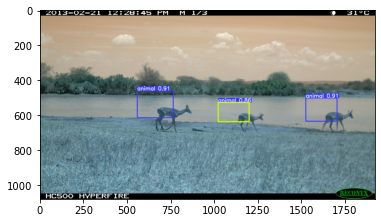

In [69]:
img = cv2.imread(test_images[1])
dw = cv2.imread(test_images[1]).shape[0]
dh = cv2.imread(test_images[1]).shape[1]

l_x,l_y,r_x,r_y = convert_yolo_to_normal(y_pred[1][0],dw,dh)

cv2.rectangle(img, (l_x,l_y), (r_x,r_y), (200, 255, 0), 6)
plt.imshow(img)

## Collect sequence

In [27]:
def calculate_num_objects(labels,seq_list,img_name):
    num_obj_seq = {}
    num_obj_img = {}
    
    for l,seq,i_name in zip(labels,seq_list,img_name):
        if seq not in num_obj_seq.keys():
            num_obj_seq[seq] = []
        num_obj_seq[seq].append(len(l))
        num_obj_img[i_name] = len(l)
    return num_obj_seq, num_obj_img
        

num_obj_seq, num_obj_img = calculate_num_objects(get_pred_labels(test_labels),data_descriptor_test.seq_id,data_descriptor_test.image_name)

In [55]:
#get_pred_labels(test_labels)

In [56]:
num_obj_seq

{'386914ce-6fe2-11eb-844f-0242ac1c0002': [1, 2, 1, 3, 1, 2, 3, 1],
 '988ae29e-21bc-11ea-a13a-137349068a90': [1, 1],
 '947b2c2c-21bc-11ea-a13a-137349068a90': [1, 1, 1],
 '386af23a-6fe2-11eb-844f-0242ac1c0002': [2, 1],
 '96760128-21bc-11ea-a13a-137349068a90': [4, 1],
 '9871f374-21bc-11ea-a13a-137349068a90': [1],
 '969ab9b4-21bc-11ea-a13a-137349068a90': [1, 1],
 '3868eee0-6fe2-11eb-844f-0242ac1c0002': [1, 1, 1, 1, 1, 1, 1],
 '38699142-6fe2-11eb-844f-0242ac1c0002': [1, 1, 1, 1, 1, 1, 1],
 '922ca874-21bc-11ea-a13a-137349068a90': [1, 1, 3],
 'a9187f88-0cd3-11eb-bed1-0242ac1c0002': [1, 1, 1, 1, 1, 1],
 '3866fb08-6fe2-11eb-844f-0242ac1c0002': [3, 1, 1, 1, 1, 1, 1, 2, 1],
 '946cf95e-21bc-11ea-a13a-137349068a90': [1, 1, 1, 1, 1, 1, 1, 1],
 '91b21776-21bc-11ea-a13a-137349068a90': [1, 1, 1],
 '94d9c5c0-21bc-11ea-a13a-137349068a90': [1, 1, 1, 1, 1, 1],
 '9788357c-21bc-11ea-a13a-137349068a90': [1],
 '8e8f2e3a-21bc-11ea-a13a-137349068a90': [1, 1, 1],
 '916916a2-21bc-11ea-a13a-137349068a90': [1, 1, 1,

In [57]:
seq_dataset = {"seq_id":[],"count":[]}
for k in num_obj_seq.keys():
    seq_dataset["seq_id"].append(k)
    seq_dataset["count"].append(num_obj_seq[k])
seq_dataset = pd.DataFrame(seq_dataset)

In [60]:
img_dataset = {"id":[],"count":[]}
for k in num_obj_img.keys():
    img_dataset["id"].append(k)
    img_dataset["count"].append(num_obj_img[k])
img_dataset = pd.DataFrame(img_dataset)

In [66]:
seq_dataset.to_csv("seq_dataset/seq_data.csv")

In [ ]:
img_dataset.to_csv("seq_dataset/img_data.csv")

# Count objects

In [92]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights)
model.eval()
clear_output()

In [153]:
#d = pd.read_csv("Seq_predictions.scv")

In [40]:
"""
images_data = pd.read_csv("ImagesMeta.csv",index_col=0)
sequence_data = pd.read_csv("SequenceCount.csv",index_col=0)
"""

In [45]:
#images_data

,name,path,bbox,n_obj
0,87a6968a-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y...",0
1,89b0a182-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,xmin ymin xmax ...,1
2,871f798e-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y...",0


In [87]:
"""
data = images_data[images_data['name']=="89b0a182-21bc-11ea-a13a-137349068a90"]['bbox'].values[0]
#data = data.split('\n')[-1]
pd.DataFrame([x.split('  ') for x in data.split('\n')])
"""

,0,1,2,3,4,...,12,13,14,15,16
0,,,,,xmin,...,xmax,,,,ymax
1,0,932.240356,203.030426,1507.561035,699.609802,...,None,None,None,None,None


In [90]:
#img_d['bbox'][1] #.to_string()[0]), ord(' ')

,xmin,ymin,xmax,ymax
0,932.240356,203.030426,1507.561035,699.609802


In [93]:
#img_d = {"name":[],"path":[],"bbox":[],"n_obj":[]}
#seq_d = {"seq":[],"n_obj_seq":[]}

#d.to_csv("Seq_predictions.scv")

In [94]:
def collect_sequence_metadate(seq_num,count):
    global seq_d
    seq_d = {"seq":[],"n_obj_seq":[]}
    seq_d['seq'].append(seq_num)
    seq_d['n_obj_seq'].append(count)
    

In [109]:
#to disable warnings of pandas assignment
pd.options.mode.chained_assignment = None
def predict_bboxes(img):
    """
    predicting bboxes for all images using yolo model
    :param img: list[Image.Image]
    :return: list[pd.DatafFrame]
    """
    def make_bbox(df):
        """
        filter bbox by confidence
        :param df: pd.DataFrame
        :return: dataframe with bbox
        """
        filtered_df = df[df['confidence'] > 0.3]
        bbox = filtered_df[['xmin', 'ymin', 'xmax', 'ymax']]
        return bbox
    
    data = model(img)
    bboxes = [make_bbox(im) for im in data.pandas().xyxy]
    
    return bboxes


def count_animals(old_bboxes, new_bboxes, image1, image2):
    """
    Count animals by difference between 2 dataframe with bboxes.
    It returns number of new animals in new image
    :param old_bboxes: pd.DataFrame
    :param new_bboxes: pd.DataFrame
    :return: int
    """
    def cond(x, y) -> bool:
        """
        return condition whether 2 bboxes are similar
        Similarity can be changed, but for now it is euclidean distance between bboxes less than threshold.
        :param x: iloc indexer of pd.DataFrame, indicating bbox
        :param y: iloc indexer of pd.DataFrame, indicating bbox
        :return: bool
        """
        threshold = 200
        x = torch.from_numpy(x.to_numpy())
        y = torch.from_numpy(y.to_numpy())
        s = torch.sum(torch.abs(x - y)).item()
        return s < threshold
    
    def tracking(traker, image1, image2, box: pd.DataFrame) -> bool:
        box = (box['xmin'], box['ymin'], box['xmax'] - box['xmin'], box['ymax'] - box['ymin'])
        frame1 = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2GRAY)
        tracker.init(frame1, box)
        frame2 = cv2.cvtColor(np.array(image2), cv2.COLOR_RGB2GRAY)
        status, bbox = traker.update(frame2)
        return status
    #temporary data structures that saves whether certain bbox in similar to bbox from previous image
    bbox = new_bboxes.copy()
    prev_bbox = old_bboxes.copy()
    prev_bbox['prev'] = False
    bbox['prev'] = False
    
    for i in range(len(old_bboxes)):
        for j in range(len(new_bboxes)):
            #if bbox is already similar to bbox from previous image, then we don't need to check this bbox
            if bbox.iloc[j]['prev'] or prev_bbox.iloc[i]['prev']:
                continue
            #similarity between bboxes from previous and present images
            if cond(old_bboxes.iloc[i], new_bboxes.iloc[j]):
                #save status of similarity
                prev_bbox['prev'][i] = True
                bbox['prev'][j] = True
                continue
            tracker = cv2.TrackerKCF_create()
            if tracking(tracker, image1, image2, old_bboxes.iloc[i].astype(int)):
                print('tracking')
                prev_bbox['prev'][i] = True
                bbox['prev'][j] = True
    #return number of non-similar(new animals) bboxes
    return bbox[bbox['prev'] == False].size.item()


#def predict_sequence(images: list[Image.Image]):
def predict_sequence(images):
    bboxes = predict_bboxes(images)
    #first image's bboxes are all animals
    count = bboxes[0].shape[0]
    for i in range(len(bboxes) - 1):
        #check the difference between two images and return new animals
        count += count_animals(bboxes[i], bboxes[i + 1], images[i], images[i + 1])
    return count

#def predict(files: list[str]):




In [113]:
def run_seq(seq_id: str) -> int:
    """
    Run predictions for certain sequence providing seq_id.
    :param seq_id: sequence
    :return: int
    """
    images = pd.read_csv(DATA+'/processed_train.csv', sep='\t', index_col=0)
    
    seq = images[images['seq_id'] == seq_id]
    image_dir = IMAGES_LOCATION + '/'
    files = [image_dir + file for file in seq.sort_values(by='seq_frame_num')['file_name'].tolist()]
    counts = predict(files)
    #collect_sequence_metadate(seq_id,counts)
    return counts

In [111]:
train_ds = pd.read_csv(DATA+'/processed_train.csv', sep='\t', index_col=0)

In [126]:
#run for all sequences in dataset
sequences = train_ds['seq_id'].unique()[0:1000]
seqs = pd.DataFrame(data={
    'seq_id': sequences,
    'animal_count': np.vectorize(lambda x: run_seq(x))(sequences)}
)
seqs = seqs[seqs['animal_count']!=-1]
#save result
seqs.to_csv('seqs.csv', sep='\t')

KeyboardInterrupt: 

In [ ]:
seqs

In [ ]:
#run_seq('a91ebc18-0cd3-11eb-bed1-0242ac1c0002')
run_seq('89b0a358-21bc-11ea-a13a-137349068a90')

5

# Count objects 2

In [ ]:
#to disable warnings of pandas assignment
pd.options.mode.chained_assignment = None
def predict_bboxes(img):
    """
    predicting bboxes for all images using yolo model
    :param img: list[Image.Image]
    :return: list[pd.DatafFrame]
    """
    def make_bbox(df):
        """
        filter bbox by confidence
        :param df: pd.DataFrame
        :return: dataframe with bbox
        """
        filtered_df = df[df['confidence'] > 0.3]
        bbox = filtered_df[['xmin', 'ymin', 'xmax', 'ymax']]
        return bbox
    
    data = model(img)
    bboxes = [make_bbox(im) for im in data.pandas().xyxy]
    
    return bboxes


def count_animals(old_bboxes, new_bboxes, image1, image2):
    """
    Count animals by difference between 2 dataframe with bboxes.
    It returns number of new animals in new image
    :param old_bboxes: pd.DataFrame
    :param new_bboxes: pd.DataFrame
    :return: int
    """
    
    def image_diff(bbox1,img1,img2):
        x_min1,y_min1,x_max1,y_max1 = bbox1.values[-1].astype(int)
        
        x_min = max(x_min1-10,0)
        y_min = max(y_min1-10,0)
        x_max = x_max1+10
        y_max = y_max1+10
        
        img1,img2 = convert_tensor(img1),convert_tensor(img2)
        
        difference = img1[:,x_min:x_max,y_min:y_max] - img2[:,x_min:x_max,y_min:y_max]
        n_cells = ((x_max - x_min)*(y_max - y_min))
        
        return (difference).sum()/n_cells
    
    def new_obj_cond(bbox,img1,img2):
        if image_diff(bbox,img1,img2)<0.3:
            return False
        return True
            
    
    def exit_obj_cond(bbox,img1,img2):
        if image_diff(bbox,img1,img2)<0.3:
            return True
        return False
    
    def cond(x, y) -> bool:
        """
        return condition whether 2 bboxes are similar
        Similarity can be changed, but for now it is euclidean distance between bboxes less than threshold.
        :param x: iloc indexer of pd.DataFrame, indicating bbox
        :param y: iloc indexer of pd.DataFrame, indicating bbox
        :return: bool
        """
        threshold = 20
        x = torch.from_numpy(x.to_numpy())
        y = torch.from_numpy(y.to_numpy())
        x = x[[0,1]]
        y = y[[0,1]]
        s = (torch.sum((x - y)**2)**0.5).item()
        return s < threshold
    """
    def tracking(traker, image1, image2, box: pd.DataFrame) -> bool:
        box = (box['xmin'], box['ymin'], box['xmax'] - box['xmin'], box['ymax'] - box['ymin'])
        frame1 = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2GRAY)
        tracker.init(frame1, box)
        frame2 = cv2.cvtColor(np.array(image2), cv2.COLOR_RGB2GRAY)
        status, bbox = traker.update(frame2)
        return status
    """
    #temporary data structures that saves whether certain bbox in similar to bbox from previous image
    bbox = new_bboxes.copy()
    prev_bbox = old_bboxes.copy()
    prev_bbox['prev'] = False
    bbox['prev'] = False
    
    
    #mapping
    for i in range(len(old_bboxes)):
        for j in range(len(new_bboxes)):
            #if bbox is already similar to bbox from previous image, then we don't need to check this bbox
            if bbox.iloc[j]['prev'] or prev_bbox.iloc[i]['prev']:
                continue
            #similarity between bboxes from previous and present images
            if cond(old_bboxes.iloc[i], new_bboxes.iloc[j]):
                #save status of similarity
                prev_bbox['prev'][i] = True
                bbox['prev'][j] = True
                continue
            
            
            """
            tracker = cv2.TrackerKCF_create()
            if tracking(tracker, image1, image2, old_bboxes.iloc[i].astype(int)):
                print('tracking')
                prev_bbox['prev'][i] = True
                bbox['prev'][j] = True
            """
    next_bbox = prev_bbox[prev_bbox['prev']==True].reindex().copy()
    print(next_bbox)
    
    bbox = bbox[bbox['prev']==False].reindex().copy()
    print(bbox)
    for i in range(len(bbox)):
        if new_obj_cond(bbox.iloc[i],image1, image2):
            next_bbox = np.concatentate([next_bbox,bbox.iloc[i]])
            
    print(next_bbox)
    
    prev_bbox = prev_bbox[prev_bbox['prev']==False].reindex().copy()
    for i in range(len(prev_bbox)):
        if exit_obj_cond(prev_bbox.iloc[i],image1, image2):
        
    #return number of non-similar(new animals) bboxes
    return bbox[bbox['prev'] == False].size.item()


#def predict_sequence(images: list[Image.Image]):
def predict_sequence(images):
    bboxes = predict_bboxes(images)
    #first image's bboxes are all animals
    count = bboxes[0].shape[0]
    for i in range(len(bboxes) - 1):
        #check the difference between two images and return new animals
        count += count_animals(bboxes[i], bboxes[i + 1], images[i], images[i + 1])
    return count

#def predict(files: list[str]):
def predict(files):
    """
    Prediction of number of animals in sequence of images.
    :param files: list[str], str is path to file
    :return: int
    """
    try:
        images = [Image.open(file) for file in files]
    except:
        return -1
    return predict_sequence(images)

In [ ]:
def run_seq(seq_id: str) -> int:
    """
    Run predictions for certain sequence providing seq_id.
    :param seq_id: sequence
    :return: int
    """
    images = pd.read_csv(DATA+'/processed_train.csv', sep='\t', index_col=0)
    
    seq = images[images['seq_id'] == seq_id]
    image_dir = IMAGES_LOCATION + '/'
    files = [image_dir + file for file in seq.sort_values(by='seq_frame_num')['file_name'].tolist()]
    counts = predict(files)
    #collect_sequence_metadate(seq_id,counts)
    return counts

# Metrics

In [76]:
seq_data = pd.read_csv(DATA + "/seqs.csv",sep='\t',index_col=1)

In [77]:
seq_data

,Unnamed: 0,animal_count
seq_id,,
30048d32-7d42-11eb-8fb5-0242ac1c0002,0,16
929aea96-21bc-11ea-a13a-137349068a90,1,0
932b6724-21bc-11ea-a13a-137349068a90,2,0
302b4594-7d42-11eb-8fb5-0242ac1c0002,3,15
5c8f4d8a-7ed0-11eb-b7d6-0242ac1c0002,4,32
...,...,...
301015f8-7d42-11eb-8fb5-0242ac1c0002,36287,10
96d13d04-21bc-11ea-a13a-137349068a90,36288,0
95715c6e-21bc-11ea-a13a-137349068a90,36289,0


In [83]:
true_data = pd.read_csv(DATA+"/train_sequence_counts.csv",index_col=0)

In [94]:
seq_data.index

Index(['30048d32-7d42-11eb-8fb5-0242ac1c0002',
       '929aea96-21bc-11ea-a13a-137349068a90',
       '932b6724-21bc-11ea-a13a-137349068a90',
       '302b4594-7d42-11eb-8fb5-0242ac1c0002',
       '5c8f4d8a-7ed0-11eb-b7d6-0242ac1c0002',
       '93ba6a96-21bc-11ea-a13a-137349068a90',
       '9650b9cc-21bc-11ea-a13a-137349068a90',
       '302f54e0-7d42-11eb-8fb5-0242ac1c0002',
       '9205274a-21bc-11ea-a13a-137349068a90',
       '90db6b86-21bc-11ea-a13a-137349068a90',
       ...
       '8c818cf0-21bc-11ea-a13a-137349068a90',
       '8f1bbb34-21bc-11ea-a13a-137349068a90',
       '9564d638-21bc-11ea-a13a-137349068a90',
       '989e2c64-21bc-11ea-a13a-137349068a90',
       '94402f8c-21bc-11ea-a13a-137349068a90',
       '301015f8-7d42-11eb-8fb5-0242ac1c0002',
       '96d13d04-21bc-11ea-a13a-137349068a90',
       '95715c6e-21bc-11ea-a13a-137349068a90',
       '8ff5e232-21bc-11ea-a13a-137349068a90',
       '974a375e-21bc-11ea-a13a-137349068a90'],
      dtype='object', name='seq_id', length=3629

In [104]:
seq_data.loc['95dae922-21bc-11ea-a13a-137349068a90']

Unnamed: 0      1051
animal_count      27
Name: 95dae922-21bc-11ea-a13a-137349068a90, dtype: int64

In [105]:
true_data.loc['95dae922-21bc-11ea-a13a-137349068a90']

count    9
Name: 95dae922-21bc-11ea-a13a-137349068a90, dtype: int64

In [113]:
pd.isnull(None)

True

In [119]:
mse = 0
for idx in true_data.index:
    if pd.isnull(seq_data.loc[idx]['animal_count']) or pd.isnull(true_data.loc[idx]['count']):
        print(idx)
    else:
        #print((seq_data.loc[idx]['animal_count'] - true_data.loc[idx]['count']))
        mse += (seq_data.loc[idx]['animal_count'] - true_data.loc[idx]['count'])**2
mse = mse**0.5/seq_data.shape[0]
mse

0.06651342265068244

In [107]:
pd.concat([true_data,seq_data])

,count,Unnamed: 0,animal_count
seq_id,,,
95dae922-21bc-11ea-a13a-137349068a90,9.0,NaN,NaN
2fff6c8a-7d42-11eb-8fb5-0242ac1c0002,9.0,NaN,NaN
300cc650-7d42-11eb-8fb5-0242ac1c0002,9.0,NaN,NaN
30125958-7d42-11eb-8fb5-0242ac1c0002,9.0,NaN,NaN
301d2d24-7d42-11eb-8fb5-0242ac1c0002,9.0,NaN,NaN
...,...,...,...
301015f8-7d42-11eb-8fb5-0242ac1c0002,NaN,36287.0,10.0
96d13d04-21bc-11ea-a13a-137349068a90,NaN,36288.0,0.0
95715c6e-21bc-11ea-a13a-137349068a90,NaN,36289.0,0.0


In [151]:
d = pd.read_csv("Seq_predictions.scv")

In [152]:
d

,Unnamed: 0,seq,img_name,path,bbox
0,0,8f3efeaa-21bc-11ea-a13a-137349068a90,877a0796-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
1,1,8b9ce12c-21bc-11ea-a13a-137349068a90,895686ca-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
2,2,9957a0ae-21bc-11ea-a13a-137349068a90,86de7b3c-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/86...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
3,3,9957a0ae-21bc-11ea-a13a-137349068a90,8a26ff62-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/8a...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
4,4,89598cee-21bc-11ea-a13a-137349068a90,87d66e32-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
5,5,89598cee-21bc-11ea-a13a-137349068a90,886ab22c-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/88...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
6,6,89598cee-21bc-11ea-a13a-137349068a90,89598b7c-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
7,7,89b0a358-21bc-11ea-a13a-137349068a90,87a6968a-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."
8,8,89b0a358-21bc-11ea-a13a-137349068a90,89b0a182-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/89...,xmin ymin xmax ...
9,9,89b0a358-21bc-11ea-a13a-137349068a90,871f798e-21bc-11ea-a13a-137349068a90,/media/danil-pass123/E/DataSet/train1/train/87...,"Empty DataFrame\nColumns: [xmin, ymin, xmax, y..."


In [125]:
#d[d['seq']=="89b0a358-21bc-11ea-a13a-137349068a90"]['img_name']
d = train_df
d[d['seq']=="8f3efeaa-21bc-11ea-a13a-137349068a90"]['bbox'][9]

for p,bbox in zip(d[d['seq']=="89b0a358-21bc-11ea-a13a-137349068a90"]['path'].values,d[d['seq']=="89b0a358-21bc-11ea-a13a-137349068a90"]['bbox']):
    bbox = bbox.values.astype(int)
    img = cv2.imread(p)
    if bbox.shape[0]!=0:
        point1,point2 = bbox[:,0:2],bbox[:,2:]
        
        for p1,p2 in zip(point1,point2):
            p1,p2 = (p1[0],p1[1]),(p2[0],p2[1])
            cv2.rectangle(img, p1, p2, (255,200,0), 5)
    plt.imshow(img)
    plt.show()

NameError: name 'train_df' is not defined